## HEART DISEASE PREDICTION PROJECT

***----------------------------------------------------------------------------***

*******Importing required libraries*******

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*******Load the dataset*******

In [2]:
df = pd.read_csv("heart_disease_dataset.csv")

In [3]:
df.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

In [4]:
df.shape

(303, 14)

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [8]:
# Correlation between all feilds

correlation_matrix = df.corr()
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

##### Assuming the target column indicating heart disease is 'target' where 1 = disease, 0 = no disease

In [9]:
heart_disease_count = df['target'].value_counts()
heart_disease_count

target
1    165
0    138
Name: count, dtype: int64

##### Plot the bar chart

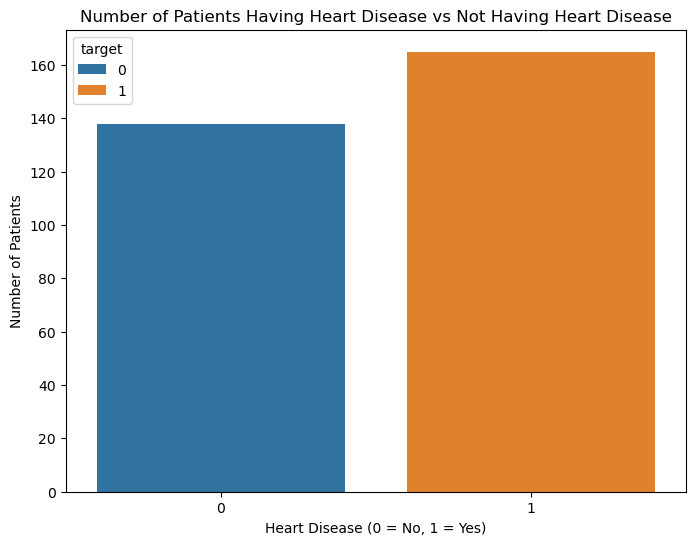

In [10]:
plt.figure(figsize = (8, 6))
sns.barplot(x = heart_disease_count.index, y = heart_disease_count.values, hue=heart_disease_count.index)
plt.title("Number of Patients Having Heart Disease vs Not Having Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.show()

##### Scatter plot: Age vs Heart Disease

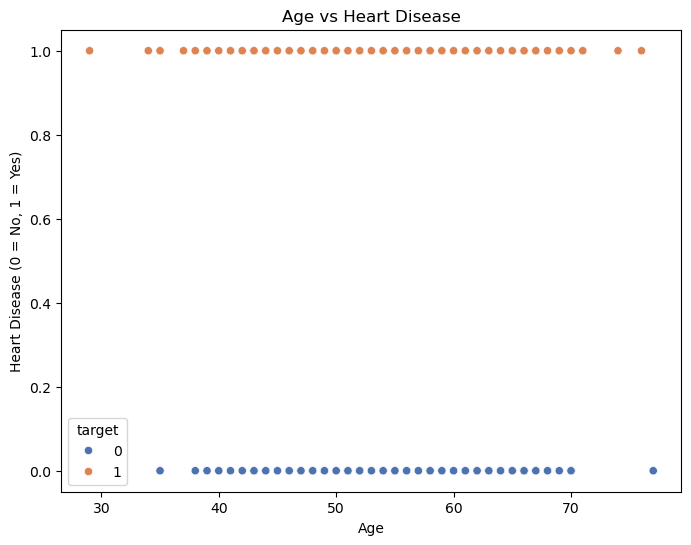

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12760\3911966939.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=df, palette="Set2")


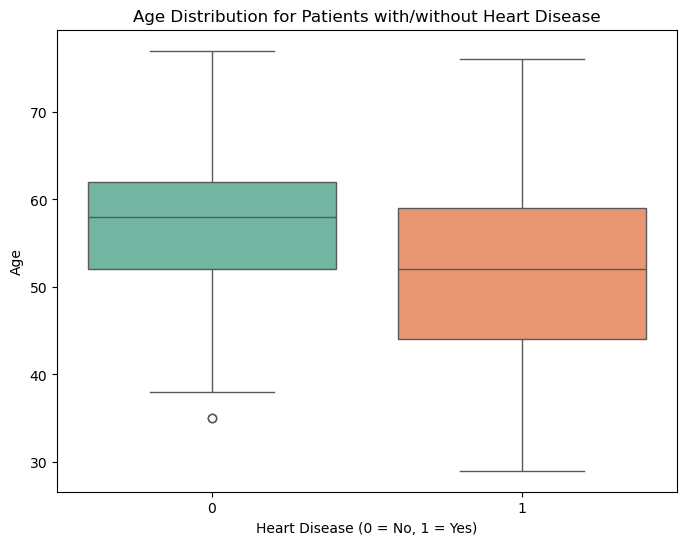

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='target', data=df, hue='target', palette="deep")
plt.title('Age vs Heart Disease')
plt.xlabel('Age')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.show()

# Box plot for age comparison
plt.figure(figsize=(8,6))
sns.boxplot(x='target', y='age', data=df, palette="Set2")
plt.title('Age Distribution for Patients with/without Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


##### Correlation Matrix and Heatmap

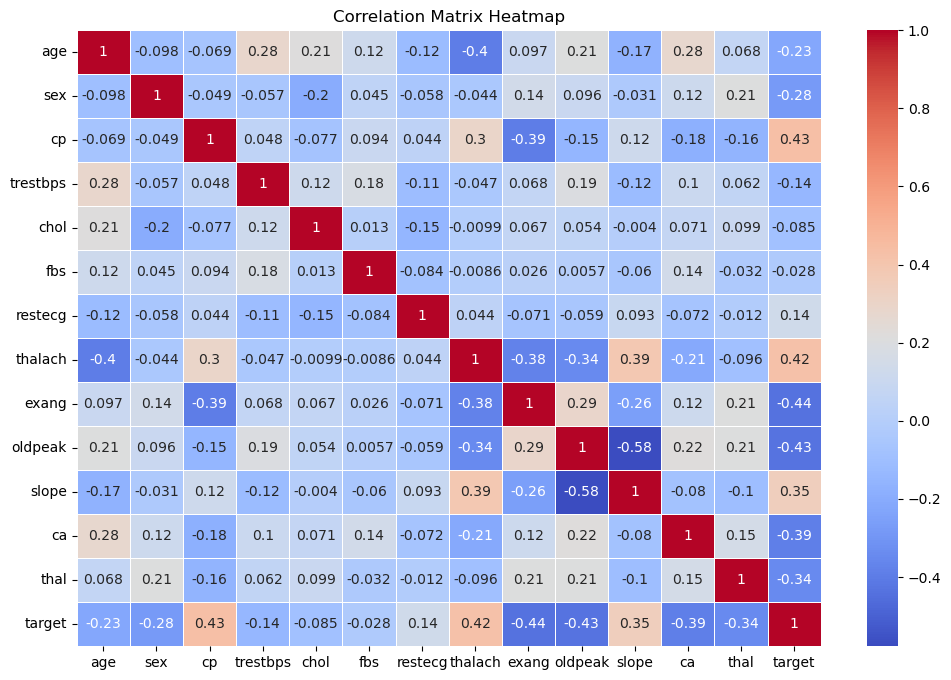

In [12]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


*****LOGISTIC REGRESSION*****

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [14]:
# Split the dataset into features (X) and target (y)

X = df.drop(columns = ['target'])
y = df['target']

In [15]:
# Step 1: Split the data into training and test sets (70:30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [16]:
# Step 2: Build the Logistic Regression model

lg = LogisticRegression(max_iter=1000) 
lg.fit(X_train, y_train)

# Predict values for the test set

y_pred_lg = lg.predict(X_test)

In [17]:
# Step 3: Build the confusion matrix

conf_matrix_lg = confusion_matrix(y_test, y_pred_lg)

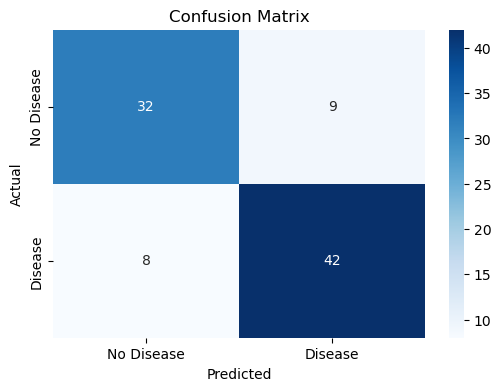

In [18]:
# Plotting the confusion matrix using seaborn heatmap

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_lg, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
# Calculate the accuracy score

accuracy_lg = accuracy_score(y_test, y_pred_lg)
print(f'Accuracy of Logistic Regression model: {accuracy_lg * 100:.2f}%')


Accuracy of Logistic Regression model: 81.32%


*****DECISION TREE*****

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [21]:
# Step 1: Split the data into training and test sets (70:30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [22]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)

In [23]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [24]:
y_pred_dt = dt.predict(X_test)

In [25]:
# Step 3: Build the confusion matrix

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

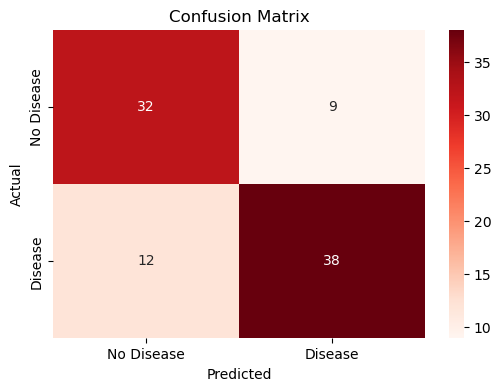

In [26]:
# Plotting the confusion matrix using seaborn heatmap

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Reds", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy of the Decision Tree model: {accuracy * 100:.2f}%')

Accuracy of the Decision Tree model: 76.92%


In [28]:
from sklearn.tree import plot_tree

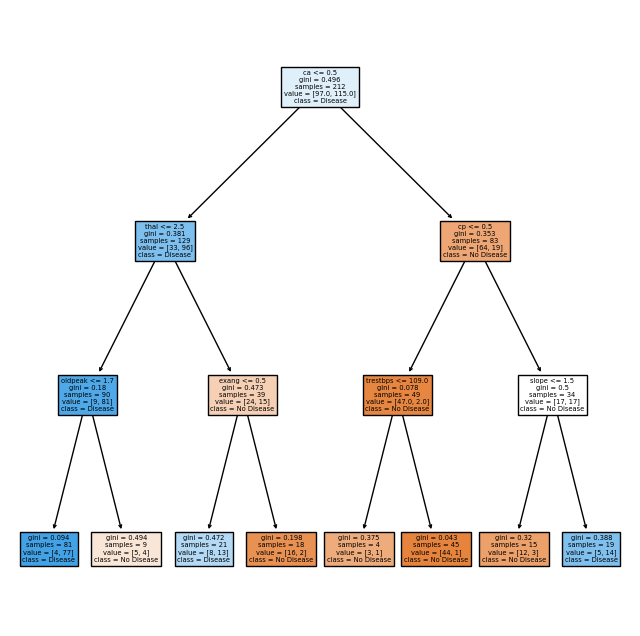

In [29]:
plt.figure(figsize=(8, 8))
plot_tree(dt, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()

*****RANDOM FOREST*****

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
# Step i: Split the data into training and test sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [32]:
# Step ii: Build the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Predict the values for the test set
y_pred_rf = rf.predict(X_test)

In [34]:
# Step iii: Build the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

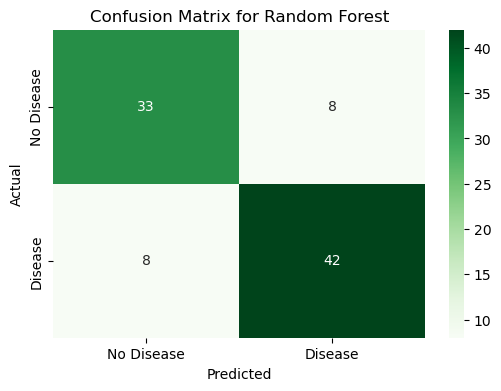

In [35]:
# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
# Calculate the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of the Random Forest model: {accuracy_rf * 100:.2f}%')

Accuracy of the Random Forest model: 82.42%


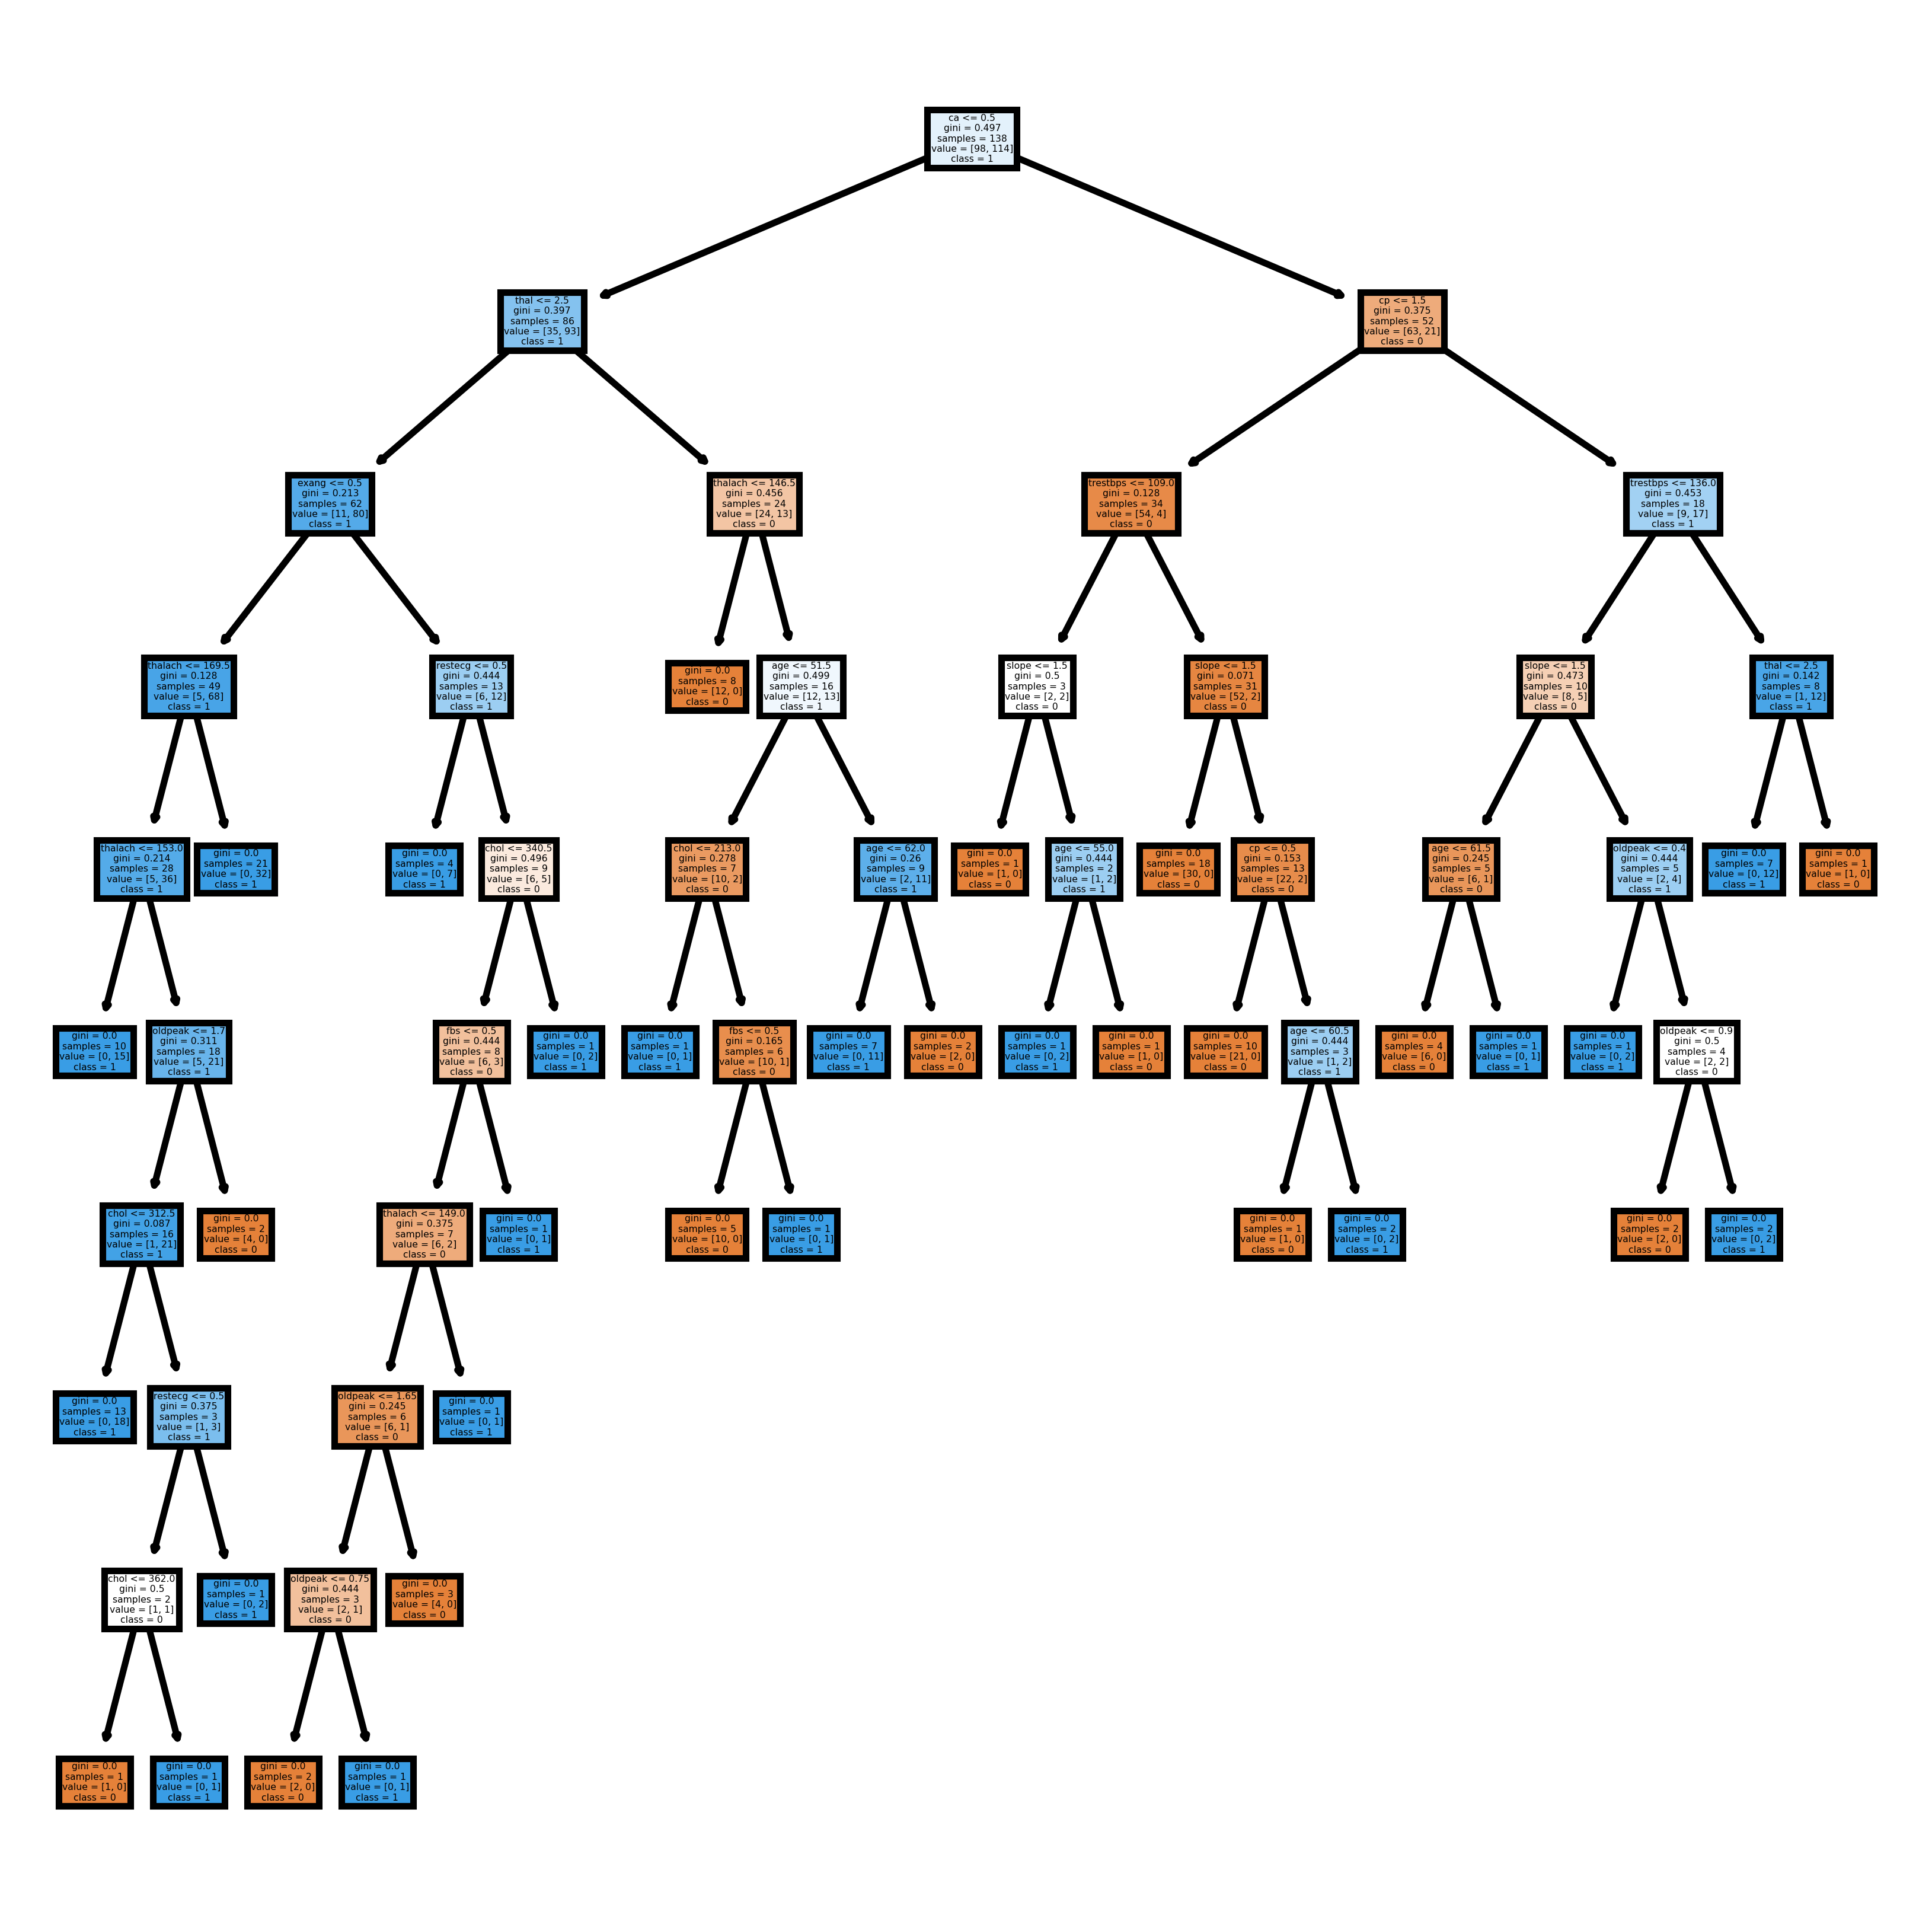

In [37]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names=X.columns,  
               class_names=[str(cls) for cls in set(y)],  
               filled=True)
fig.savefig('rf_individualtree.png')

In [38]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18,6), dpi=900)
for index in range(5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names=X.columns,  
                   class_names=[str(cls) for cls in set(y)], 
                   filled=True,
                   ax=axes[index])
    axes[index].set_title(f'Estimator: {index}', fontsize=11)
fig.savefig('rf_5trees.png')


*****MODEL SELECTION*****

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score

In [40]:
###Print Confusion Matrix, Classification Report for each model ###
models = {
    'Logistic Regression': y_pred_lg,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
}

for model_name, y_pred in models.items():
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Confusion Matrix for Logistic Regression:
[[32  9]
 [ 8 42]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

--------------------------------------------------
Confusion Matrix for Decision Tree:
[[32  9]
 [12 38]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.73      0.78      0.75        41
           1       0.81      0.76      0.78        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

--------------------------------------------------
Confusion Matrix for Random Forest:
[[33

In [41]:
### Calculate Precision, Recall, and F1 Score for each model ###
for model_name, y_pred in models.items():
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{model_name} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, Accuracy: {accuracy * 100:.2f}%")

Logistic Regression - Precision: 0.82, Recall: 0.84, F1 Score: 0.83, Accuracy: 81.32%
Decision Tree - Precision: 0.81, Recall: 0.76, F1 Score: 0.78, Accuracy: 76.92%
Random Forest - Precision: 0.84, Recall: 0.84, F1 Score: 0.84, Accuracy: 82.42%


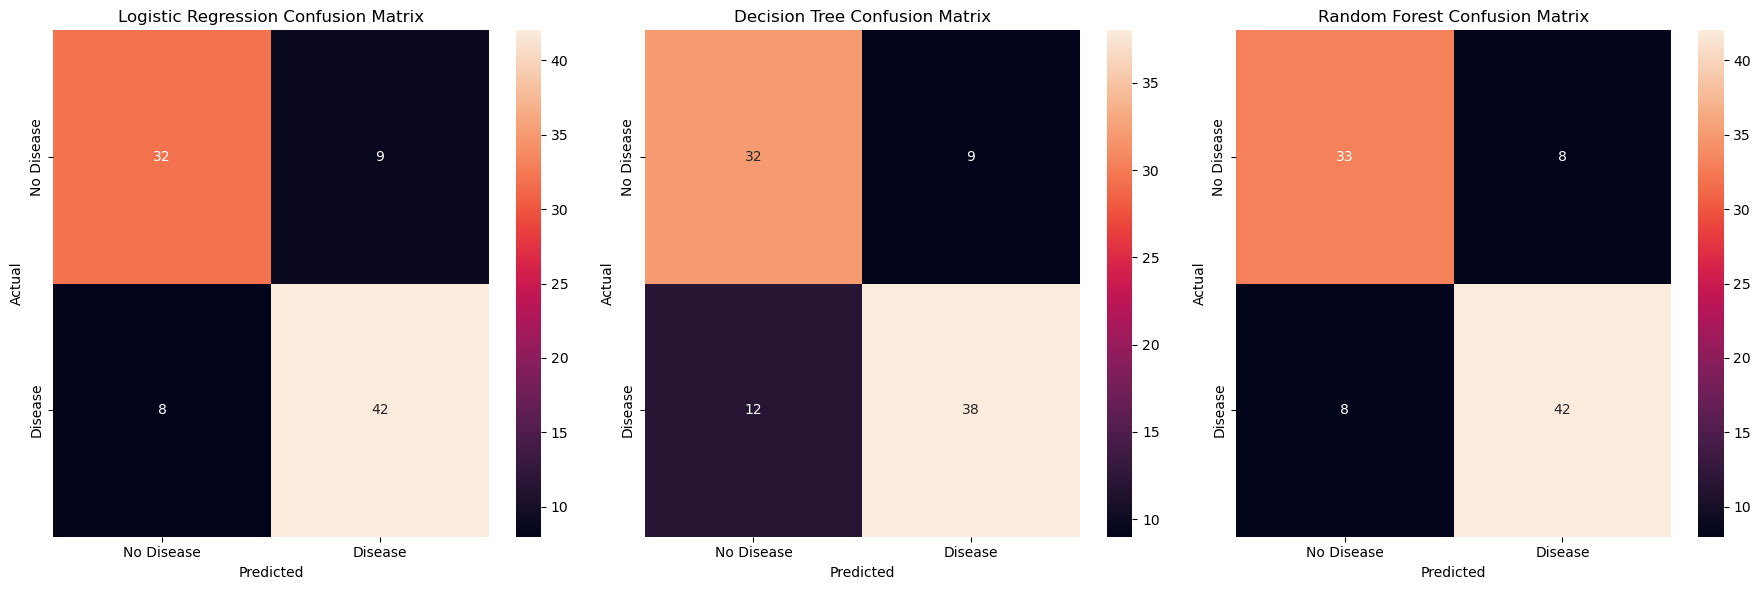

In [42]:
### Step 4: Visualize Confusion Matrices using Heatmaps ###
plt.figure(figsize=(18, 6))
for idx, (model_name, y_pred) in enumerate(models.items(), 1):
    plt.subplot(1, 3, idx)
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [43]:
### Select the best model based on accuracy ###
accuracies = {model_name: accuracy_score(y_test, y_pred) for model_name, y_pred in models.items()}
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]

print(f"The best model is {best_model_name} with an accuracy of {best_accuracy * 100:.2f}%")

The best model is Random Forest with an accuracy of 82.42%


*******Finally, the best model is RANDOM FOREST CLASSIFIER*******

## Save the model

In [45]:
#Import Joblib and save the model

In [46]:
import joblib

In [47]:
joblib.dump(rf, "heart_disease_model.pkl")
print("✅ Model saved as heart_disease_model.pkl")

✅ Model saved as heart_disease_model.pkl
